# Exploratory Analysis for Ralphs transaction

For the next three questions, download the `"sales2018.csv.gz"` file at https://www.dropbox.com/s/rc2noggb91kcims/sales2018.csv.gz?dl=0 (click the Download button at the top right on Dropbox, do not try to extract it but leave it as a compressed file) and save it in a folder accessible from the current directory. Load this into a DataFrame. The first few rows are as below.

In [1]:
import pandas as pd
sales=pd.read_csv('sales2018.csv.gz')
sales.head()

,sales_period,region,chain_id,BDC,BDC_description,GTIN,sales,returns
0,1,SOUTHWEST,6.0,2015006,LAY'S XL HON BBQ,28400200684,40.656,0.000
1,1,SOUTHWEST,6.0,2015009,LAY'S XL KCM,28400199612,269.104,1.936
2,1,SOUTHWEST,6.0,2015011,LAY'S XL REG,28400199148,425.920,3.872
3,1,SOUTHWEST,6.0,2015014,LAY'S XL REG WAVY,28400043809,7.744,0.000
4,1,SOUTHWEST,6.0,2015014,LAY'S XL REG WAVY,28400199544,114.224,5.808


## 1. National Trends and Regional Comparisons


(a) Group the data by the column "sales_period", and compute the total sales in each period. Plot the total sales and update the title, xlabel and ylabel as below. 

```python
import matplotlib.pyplot as plt
plt.ylim(bottom=0)
```

Text(0.5,0,'Sales Period (1 period is 4 weeks)')

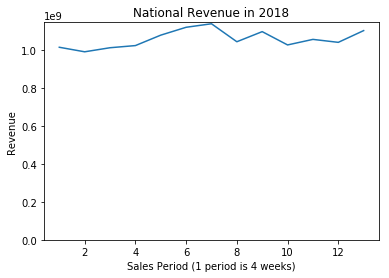

In [3]:
import matplotlib.pyplot as plt
s=sales.groupby('sales_period')['sales'].sum()
s.plot()
plt.ylim(bottom=0)
plt.title("National Revenue in 2018")
plt.ylabel("Revenue")
plt.xlabel("Sales Period (1 period is 4 weeks)")

(b) Group the data by the column "region", compute the total sales from each region, and plot using a bar plot as below.

Text(0.5,0,'Region')

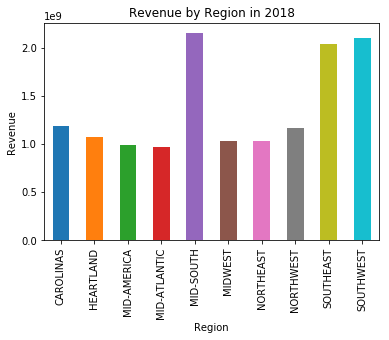

In [6]:
r=sales.groupby("region")['sales'].sum()
r.plot(kind='bar')
plt.title("Revenue by Region in 2018")
plt.ylabel("Revenue")
plt.xlabel("Region")

## 2. Examining Products that Are Often Returned (Due to Expiration)

The column named "returns" documents the value of the product that is returned from the retailer during the sales period (because the product is expired). The manufacturer (FritoLays) has committed to buy back all of the products that are expired, so the retailers do not bear the associated risks. This part is to zoom in to a product that is returned a lot and figure out what happened.

(a) Group the data by the column "GTIN" (product ID) and compute the total sales and returns for each product. Create a scatter plot as below where each point corresponds to a product, the x-axis corresponds to the total sales, and the y-axis corresponds to the total returns. 

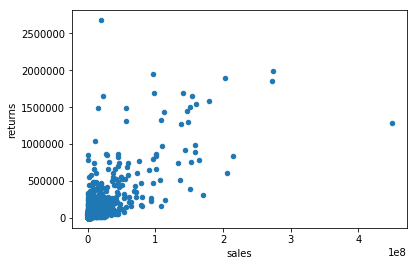

In [14]:
p=sales.groupby("GTIN")['sales','returns'].sum()
p.plot(x='sales',y='returns',kind='scatter')

(b) Create a new DataFrame called "products" in which each row is indexed by the GTIN (product ID). There should be four columns. 

- BDC_description: the first occurrence of the corresponding column in the original dataset for this GTIN.
- sales: the total sales for this GTIN.
- returns: the total returns for this GTIN.
- return_ratio: the above column (returns) divided by the previous column (sales).

Filter this DataFrame so that waste is at least 0.1 (10 percent), sort by the column "returns" in descending order, and display the first five rows.

In [31]:
products = sales.groupby('GTIN')\
            .agg({'BDC_description':'first','sales':'sum','returns':'sum'})
products['return_ratio']=products['returns']/products['sales']
products[products['return_ratio']>=0.1].sort_values('returns',ascending = False).head(5)

,BDC_description,sales,returns,return_ratio
GTIN,,,,
28400923293,DR XXVL INFERNO,1.922410e+07,2678771.550,0.139344
28400600927,DORITO X-XVL NUG/CHD,1.478977e+07,1490084.315,0.100751
28400601290,MATADO 6CT TERI,6.136973e+05,857300.640,1.396944
28400601320,MATADO 6CT ORIG,8.393314e+05,787043.040,0.937702
28400674751,LB XXVL PAB BBQ,4.383899e+06,581055.565,0.132543


(c) As seen above, the product with the highest returns in 2018 is "DR XXVL INFERNO", with GTIN 28400923293. Filter the original dataset to only show this product and compute the return ratio for each region separately (by first grouping by the region and computing the sum of sales and returns in each region, and then dividing the total returns by the total sales in each region.) Sort the result by return ratio and plot the return ratio by region as below.

Text(0.5,1,'Return ratio of DR XXVL INFERNO by region')

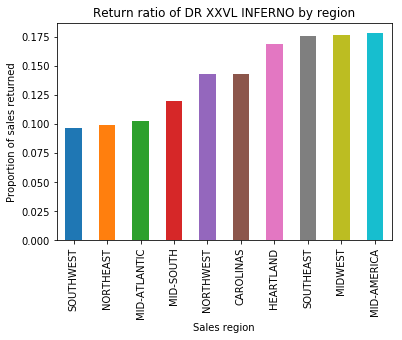

In [54]:
high=sales[sales['GTIN']==28400923293].groupby('region')\
                    .agg({'sales':'sum','returns':'sum'})
high['return_ratio']=high['returns']/high['sales']
high.sort_values('return_ratio',ascending = True).head(10).plot(y='return_ratio',kind='bar',legend=None)
plt.ylabel('Proportion of sales returned')
plt.xlabel('Sales region')
plt.title('Return ratio of DR XXVL INFERNO by region')

(d) Filtering again for the same GTIN as above, group by the sales_period and compute the total sales and returns in each period, and plot both columns as below. 

As can be seen, Fritolays pushed out a lot of sales of this product in the early periods, but evidently there were a lot of expirations in periods 6 through 9, which drove the high returns for this product.

Text(0.5,1,'What happened to DR XXVL INFERNO in 2018?')

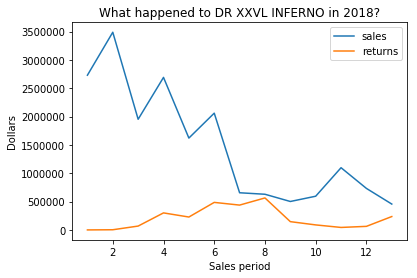

In [55]:
gtin1 = 28400923293
returnperiod = sales.query('GTIN == @gtin1').groupby('sales_period')[['sales','returns']].sum()
returnperiod.plot()
plt.xlabel('Sales period')
plt.ylabel('Dollars')
plt.title('What happened to DR XXVL INFERNO in 2018?')

## 3. Differential Taste Preferences across Regions

(a) Create a DataFrame called "products". Add a column called "hot" which corresponds to whether the BDC_description contains the substrings "HOT" or "SPY" or "FLAM". 

In [56]:
products = sales.groupby('GTIN')\
            .agg({'BDC_description':'first','sales':'sum','returns':'sum'})
products['hot'] = products['BDC_description'].str.contains('HOT') | products['BDC_description'].str.contains('SPY') \
                | products['BDC_description'].str.contains('FLAM')
products = products.sort_values('sales', ascending = False)
products.head()

,BDC_description,sales,returns,hot
GTIN,,,,
28400642033,DORITOS XXL NAC,4.492523e+08,1.281142e+06,False
28400064088,TOSTITOS XXL SCOOPS,2.731882e+08,1.993287e+06,False
28400645492,LAY'S XXL REG,2.723866e+08,1.854966e+06,False
28400002899,VPK SUPER WHTCRN,2.149266e+08,8.349600e+05,False
28400596688,CT PUF XL JUMBO,2.064506e+08,6.129386e+05,False


(b) Merge the data table. 

In [57]:
sales2 = sales.merge(products[['hot']], on = ['GTIN'], how = 'left')
sales2.head()

,sales_period,region,chain_id,BDC,BDC_description,GTIN,sales,returns,return_ratio,hot
0,1,SOUTHWEST,6.0,2015006,LAY'S XL HON BBQ,28400200684,40.656,0.000,0.000000,False
1,1,SOUTHWEST,6.0,2015009,LAY'S XL KCM,28400199612,269.104,1.936,0.007194,False
2,1,SOUTHWEST,6.0,2015011,LAY'S XL REG,28400199148,425.920,3.872,0.009091,False
3,1,SOUTHWEST,6.0,2015014,LAY'S XL REG WAVY,28400043809,7.744,0.000,0.000000,False
4,1,SOUTHWEST,6.0,2015014,LAY'S XL REG WAVY,28400199544,114.224,5.808,0.050847,False


(c) Run the following code to groupby the columns "region" and "hot" and compute the total sales in each combination.


In [68]:
s=sales2.groupby(['region','hot'])['sales'].sum()
s

region        hot  
CAROLINAS     False    1.107189e+09
              True     7.554390e+07
HEARTLAND     False    9.417314e+08
              True     1.332320e+08
MID-AMERICA   False    9.045835e+08
              True     8.757321e+07
MID-ATLANTIC  False    9.225461e+08
              True     4.773408e+07
MID-SOUTH     False    1.789494e+09
              True     3.601769e+08
MIDWEST       False    9.547019e+08
              True     8.184948e+07
NORTHEAST     False    9.987505e+08
              True     3.831104e+07
NORTHWEST     False    1.035705e+09
              True     1.266731e+08
SOUTHEAST     False    1.863230e+09
              True     1.745410e+08
SOUTHWEST     False    1.624273e+09
              True     4.805738e+08
Name: sales, dtype: float64

The above result is a Series object with two levels of indices, "region" and "hot". The values are displayed in the right most column above, and the label for each row is a combination of terms. The first value corresponds to the label ("CAROLINAS", False), the second value of correspond to the label ("CAROLINAS",True), the third corresponds to ("HEARTLAND", False), etc.

Using the unstack function and plot the result.

In [71]:
s=sales2.groupby(['region','hot'])['sales'].sum().unstack()
s

hot,False,True
region,,
CAROLINAS,1.107189e+09,7.554390e+07
HEARTLAND,9.417314e+08,1.332320e+08
MID-AMERICA,9.045835e+08,8.757321e+07
MID-ATLANTIC,9.225461e+08,4.773408e+07
MID-SOUTH,1.789494e+09,3.601769e+08
MIDWEST,9.547019e+08,8.184948e+07
NORTHEAST,9.987505e+08,3.831104e+07
NORTHWEST,1.035705e+09,1.266731e+08
SOUTHEAST,1.863230e+09,1.745410e+08


Text(0,0.5,'Total revenue')

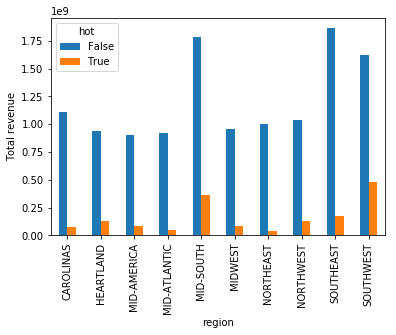

In [74]:
s.plot(kind='bar')
plt.ylabel('Total revenue')

As can be seen, the regions Mid-South and Southwest have the most proportion of revenue coming from spicy products, which makes sense as these regions have spicy tastes.